In [1]:
sys.path.insert(0, './common')

import sys
import wave
import ppo_model

c:\Users\nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
env_path = 'collectible/Wave'

In [3]:
env = wave.WaveEnv(env_path)

WAVE environment created.


In [5]:
hidden_layer = 1024
ppo_epochs = 5
clip = 0.2
minibatch_size=128
model = ppo_model.PPO(127, 2, hidden_layer, lr=1e-4, minibatch_size=minibatch_size, ppo_epochs=ppo_epochs, clip=clip)

In [6]:
save_path = f'./results/collectible/ppo-1024-128-'
model.set_model_save_path(save_path)

In [15]:
model.load_model()

No model available
Error load training history ./results/collectible/ppo-exp-ent-5-clip-0.2-size-64-dualhead/train_rewards.csv not found.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


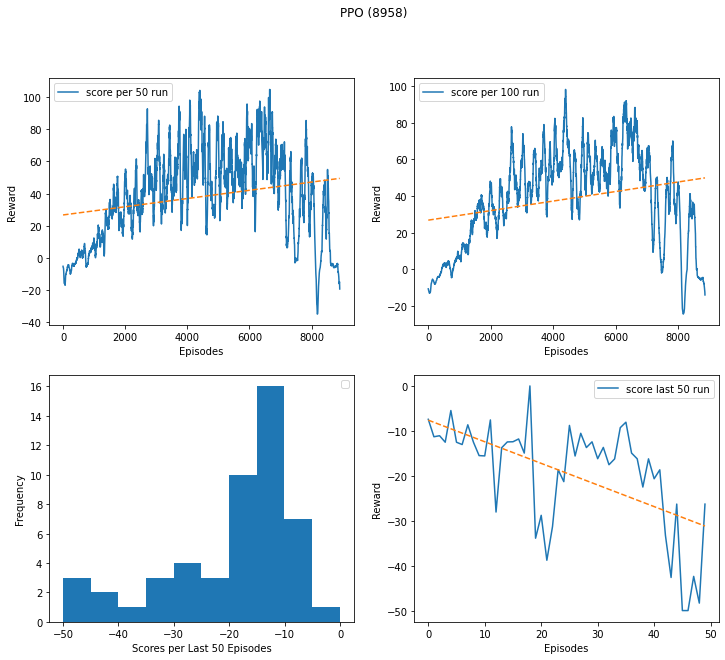

EPOCH: 8957, total reward: -26.329998940229416, timestep: 427, lr: 0.0001


KeyboardInterrupt: 

In [7]:
model.set_train_params(max_step=1000, plot_smooth=50, gamma=0.99)
model.train(env, 10000, show_plot=True)

In [7]:
model.save_model()

Model saved
Training history saved


In [8]:
save_path

'./results/collectible/ppo-exp-ent-5-clip-0.2-size-64-decay'

In [3]:
import saver
saver.save_wave_model(hidden_layer, f'{save_path}/actor.pth', f'{save_path}/model.onnx')

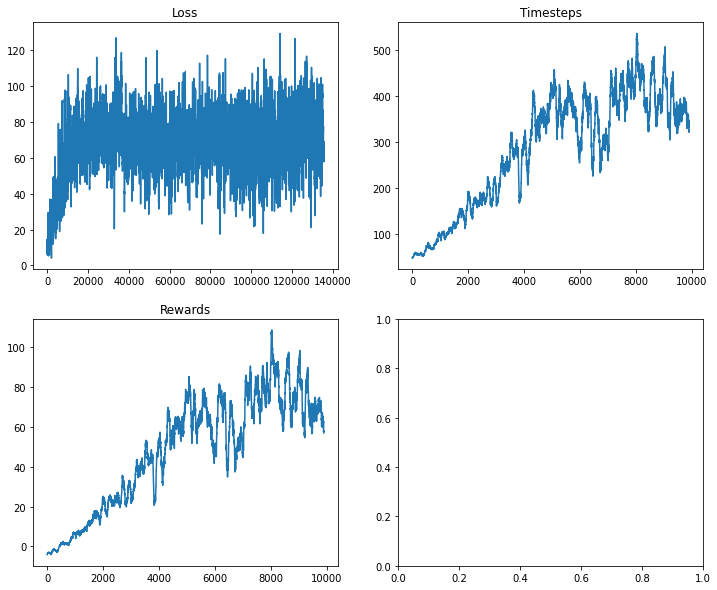

In [9]:
model.plot_train_memory(smooth=100)

In [18]:
env = wave.WaveEnv(env_path, 3)
model.test(env)

WAVE environment created.
tensor([[1.2612e-07, 1.0000e+00]], grad_fn=<DivBackward0>) tensor([[9.5159]], grad_fn=<AddmmBackward0>) [[5.72632    0.58139926 0.8788889  0.         0.         1.
  1.         0.         0.         1.         1.         0.
  0.         1.         1.         0.         0.         1.
  1.         0.         0.         1.         1.         0.
  0.         1.         1.         0.         0.         1.
  1.         0.         0.         1.         1.         0.
  0.         1.         1.         0.         0.         1.
  1.         0.         0.         1.         1.         0.
  0.         1.         1.         0.         0.         1.
  1.         0.         0.         1.         1.         0.
  0.         1.         1.         0.         0.         1.
  1.         0.         0.         1.         1.         0.
  0.         1.         1.         0.         0.         1.
  1.         0.         0.         1.         1.         0.
  0.         1.         1.    

(322.79995438456535, 1544)

In [5]:
model.test_avg(lambda time_scale: wave.WaveEnv(env_path, time_scale), 10, 40)

WAVE environment created.
TRY 1: 27.578163803787902, 295
WAVE environment created.
TRY 2: 113.29353512567468, 1048
WAVE environment created.
TRY 3: -7.392701272619888, 40
WAVE environment created.
TRY 4: 27.578162788646296, 295
WAVE environment created.
TRY 5: 143.58335070242174, 1131
WAVE environment created.
TRY 6: 117.58527275850065, 1047
WAVE environment created.
TRY 7: 164.5931766491849, 1382
WAVE environment created.
TRY 8: 44.004736255155876, 460
WAVE environment created.
TRY 9: 62.128610032843426, 565
WAVE environment created.
TRY 10: 109.57957596075721, 925


(80.25318828043528, 718.8)

In [8]:
env.close()